255


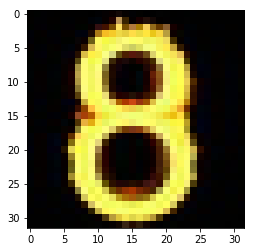

In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
#im = Image.open('myphoto32.jpg', 'r')
#im = Image.open('myphoto.jpg', 'r')
im = Image.open('Number8Rename.jpg', 'r')
width, height = im.size
pix_val = list(im.getdata())
pix_val_flat = [x for sets in pix_val for x in sets]
print(max(pix_val_flat))
pixel_values = np.array(pix_val_flat).reshape(height, width, 3)

#pixel_values = pixel_values[300:300+32,150:150+32,:]
#pixel_values = pixel_values[int(((height-1)/2.7)-100):int(((height-1)/2.7)+100),int(((width-1)/2)-100):int(((width-1)/2)+100),:]
#plt.imshow(pixel_values1)
#plt.imshow((pixel_values * 255).astype(np.uint8))
plt.imshow(pixel_values)
plt.show()

In [2]:
InputLayer = pixel_values
InputLayer.shape
#width-1,int((height-1)/2)

(32, 32, 3)

In [3]:
WeightsForLayer1ConvFilters = {}
BiasesForLayer1ConvFilters = {}
for i in range(0,6):
    WeightsForLayer1ConvFilters[i] = np.random.randn(5,5,3)
    BiasesForLayer1ConvFilters[i] = np.random.randn(1)
    
firstLayerConvolutionFilter = {}
for i in range(0,6):
    #firstLayerConvolutionFilter[i] = np.zeros((InputLayer.shape[0]-4)*(InputLayer.shape[1]-4)).reshape((InputLayer.shape[0]-4),(InputLayer.shape[1]-4))
    firstLayerConvolutionFilter[i] = np.zeros((InputLayer.shape[0])*(InputLayer.shape[1])).reshape((InputLayer.shape[0]),(InputLayer.shape[1]))


In [4]:
firstLayerConvolutionFilter[0].shape

(32, 32)

In [5]:
for k in range(0,6):
    for i in range(0,InputLayer.shape[0]):
        for j in range(0,InputLayer.shape[1]):
            if((i in [0,1,InputLayer.shape[0]-2,InputLayer.shape[0]-1]) or (j in [0,1,InputLayer.shape[1]-2,InputLayer.shape[1]-1])):
                pass
                #firstLayerConvolutionFilter[k][i][j] = 0
            else:
                firstLayerConvolutionFilter[k][i][j] = np.sum(InputLayer[i-2:i+3,j-2:j+3,:] * WeightsForLayer1ConvFilters[k]) + BiasesForLayer1ConvFilters[k]
    firstLayerConvolutionFilter[k] = firstLayerConvolutionFilter[k][2:-2,2:-2]

In [6]:
firstLayerConvolutionFilter[0].shape

(28, 28)

In [7]:
def getSigmoid(x,method):
    if(method == 'Sigmoid'):
        x = np.clip(x,-500,500)
        return 1/(1+np.exp(-x))        
    elif(method == 'Relu'):
        #x = np.clip(x,-500,+500)
        return np.maximum(x, 0.1*x)
        #return (abs(x) + x) / 2         
    elif(method == 'tanhx'):
        return (2*(getSigmoid(2*x,'Sigmoid')))-1

In [8]:
for k in range(0,6):
    firstLayerConvolutionFilter[k] = getSigmoid(firstLayerConvolutionFilter[k],'Relu')

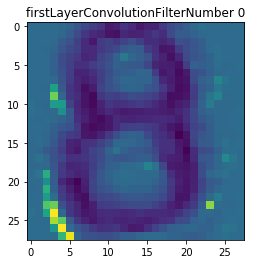

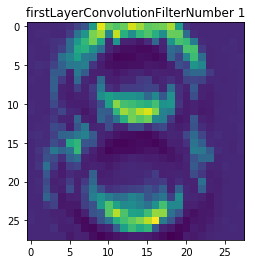

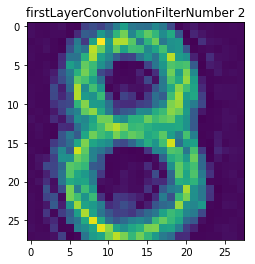

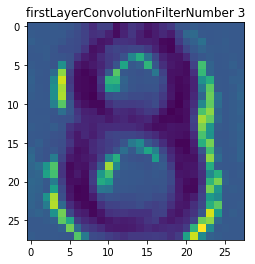

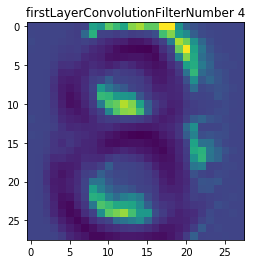

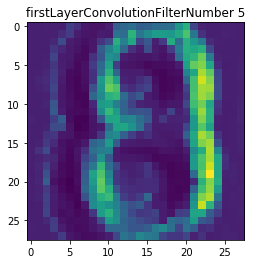

In [9]:
for k in range(0,6):
    plt.title('firstLayerConvolutionFilterNumber {label}'.format(label=str(k)))
    plt.imshow(firstLayerConvolutionFilter[k])
    plt.show()


In [10]:
SecondLayerPooling = {}
for i in range(0,6):    
    SecondLayerPooling[i] = np.zeros(int(firstLayerConvolutionFilter[i].shape[0]/2)*int(firstLayerConvolutionFilter[i].shape[1]/2)).reshape(int(firstLayerConvolutionFilter[i].shape[0]/2),int(firstLayerConvolutionFilter[i].shape[1]/2))

In [11]:
for k in range(0,6):
    for i in range(0,SecondLayerPooling[k].shape[0]):
        for j in range(0,SecondLayerPooling[k].shape[1]):
             SecondLayerPooling[k][i][j] = np.max(firstLayerConvolutionFilter[k][2*i:(2*i)+2,2*j:(2*j)+2])            

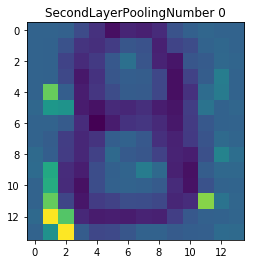

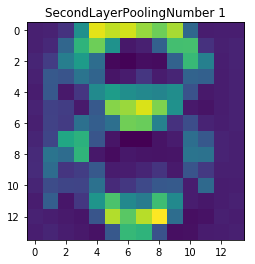

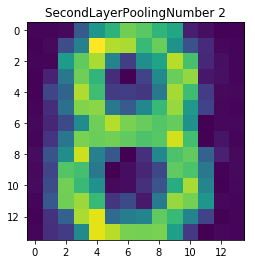

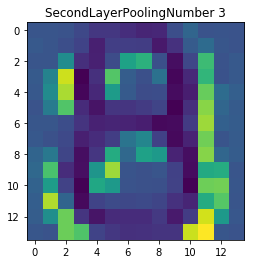

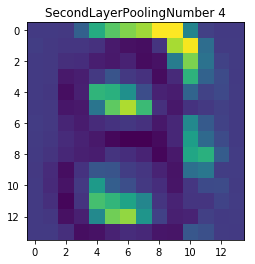

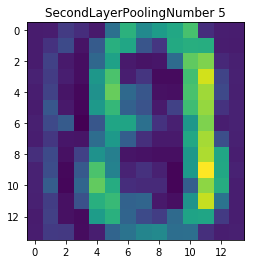

In [12]:
for k in range(0,6):
    plt.title('SecondLayerPoolingNumber {label}'.format(label=str(k)))
    plt.imshow(SecondLayerPooling[k])
    plt.show()

In [13]:
SecondLayerPoolingEntireVolume = []
for i in range(0,SecondLayerPooling[0].shape[0]):
    temp1 = []
    for j in range(0,SecondLayerPooling[0].shape[1]):
        temp2 = []
        for k in range(0,6):
            temp2.append(SecondLayerPooling[k][i,j])
        temp1.append(temp2)
    SecondLayerPoolingEntireVolume.append(temp1)     

In [14]:
SecondLayerPoolingEntireVolume = np.array(SecondLayerPoolingEntireVolume)
SecondLayerPoolingEntireVolume.shape

(14, 14, 6)

In [15]:
WeightsForLayer3ConvFilters = {}
BiasesForLayer3ConvFilters = {}
for i in range(0,16):
    WeightsForLayer3ConvFilters[i] = np.random.randn(5,5,6)
    BiasesForLayer3ConvFilters[i] = np.random.randn(1)
    
ThirdLayerConvolutionFilter = {}
for i in range(0,16):
    ThirdLayerConvolutionFilter[i] = np.zeros((SecondLayerPooling[0].shape[0])*(SecondLayerPooling[0].shape[1])).reshape((SecondLayerPooling[0].shape[0]),(SecondLayerPooling[0].shape[1]))


In [16]:
for k in range(0,16):
    for i in range(0,ThirdLayerConvolutionFilter[k].shape[0]):
        for j in range(0,ThirdLayerConvolutionFilter[k].shape[1]):
            if((i in [0,1,ThirdLayerConvolutionFilter[k].shape[0]-2,ThirdLayerConvolutionFilter[k].shape[0]-1]) or (j in [0,1,ThirdLayerConvolutionFilter[k].shape[1]-2,ThirdLayerConvolutionFilter[k].shape[1]-1])):
                pass
                #firstLayerConvolutionFilter[k][i][j] = 0
            else:
                ThirdLayerConvolutionFilter[k][i][j] = np.sum(SecondLayerPoolingEntireVolume[i-2:i+3,j-2:j+3,:] * WeightsForLayer3ConvFilters[k]) + BiasesForLayer3ConvFilters[k]
    ThirdLayerConvolutionFilter[k] = ThirdLayerConvolutionFilter[k][2:-2,2:-2]

In [17]:
for k in range(0,16):
    ThirdLayerConvolutionFilter[k] = getSigmoid(ThirdLayerConvolutionFilter[k],'Relu')

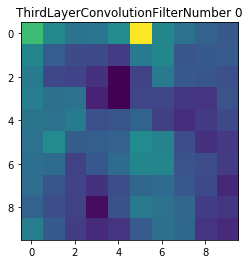

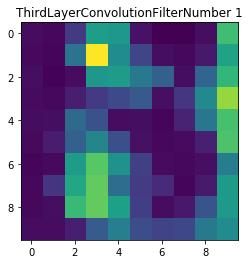

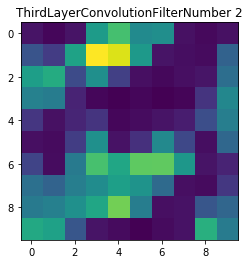

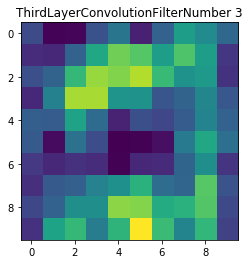

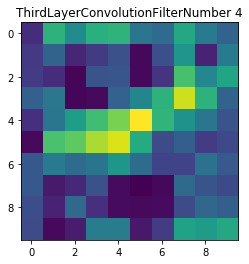

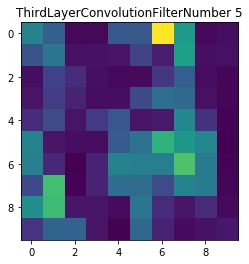

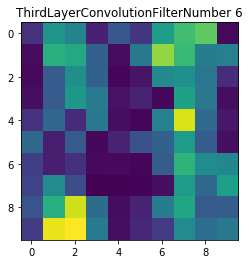

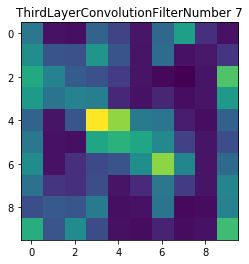

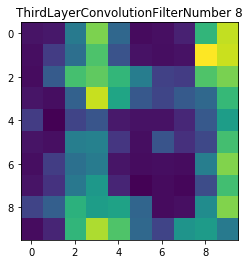

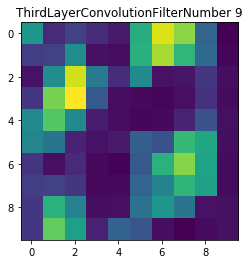

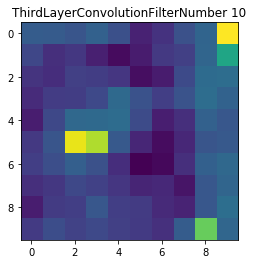

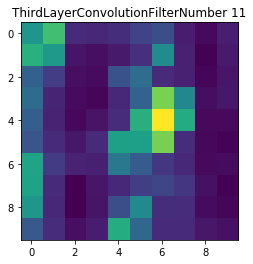

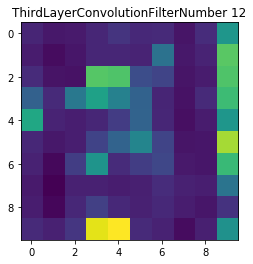

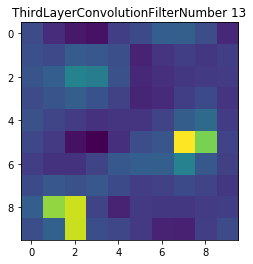

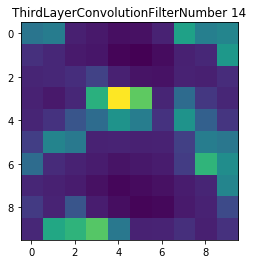

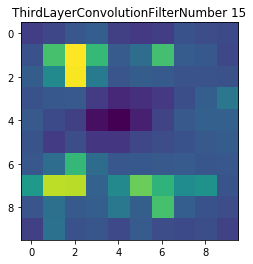

In [18]:
for k in range(0,16):
    plt.title('ThirdLayerConvolutionFilterNumber {label}'.format(label=str(k)))
    plt.imshow(ThirdLayerConvolutionFilter[k])
    plt.show()


In [19]:
FourthLayerPooling = {}
for i in range(0,16):    
    FourthLayerPooling[i] = np.zeros(int(ThirdLayerConvolutionFilter[i].shape[0]/2)*int(ThirdLayerConvolutionFilter[i].shape[1]/2)).reshape(int(ThirdLayerConvolutionFilter[i].shape[0]/2),int(ThirdLayerConvolutionFilter[i].shape[1]/2))

In [20]:
for k in range(0,16):
    for i in range(0,FourthLayerPooling[k].shape[0]):
        for j in range(0,FourthLayerPooling[k].shape[1]):
             FourthLayerPooling[k][i][j] = np.max(ThirdLayerConvolutionFilter[k][2*i:(2*i)+2,2*j:(2*j)+2])            

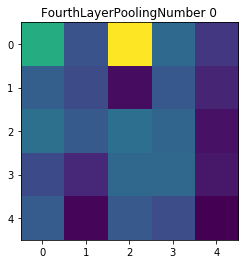

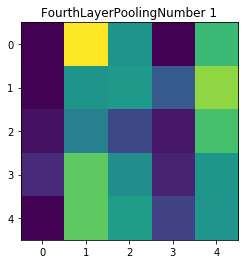

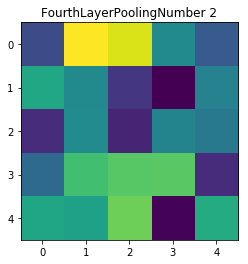

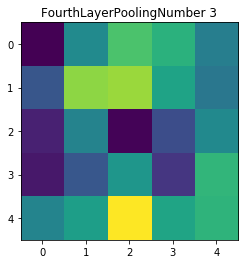

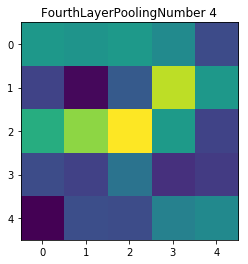

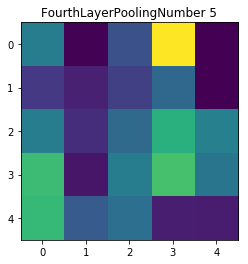

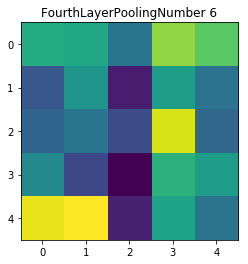

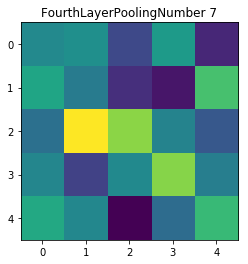

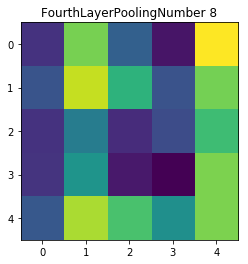

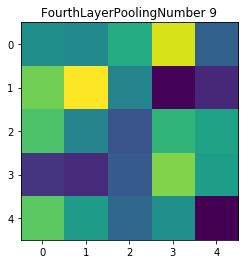

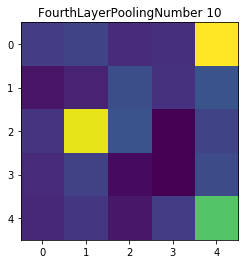

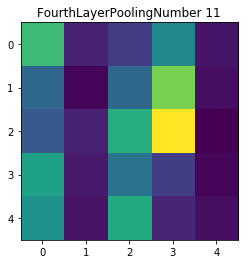

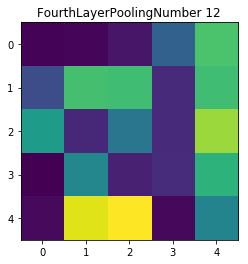

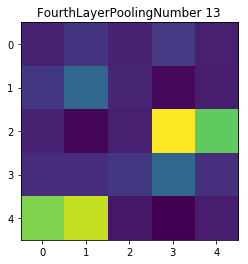

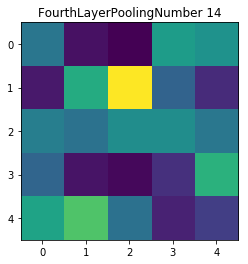

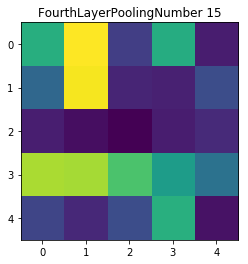

In [21]:
for k in range(0,16):
    plt.title('FourthLayerPoolingNumber {label}'.format(label=str(k)))
    plt.imshow(FourthLayerPooling[k])
    plt.show()

In [22]:
FourthLayerPoolingEntireVolume = []
for i in range(0,FourthLayerPooling[0].shape[0]):
    temp1 = []
    for j in range(0,FourthLayerPooling[0].shape[1]):
        temp2 = []
        for k in range(0,16):
            temp2.append(FourthLayerPooling[k][i,j])
        temp1.append(temp2)
    FourthLayerPoolingEntireVolume.append(temp1)     
FourthLayerPoolingEntireVolume = np.array(FourthLayerPoolingEntireVolume)
FourthLayerPoolingEntireVolume.shape

(5, 5, 16)

In [23]:
FourthLayerPoolingEntireVolume_flat = [x for sets in FourthLayerPoolingEntireVolume for temp1 in sets for x in temp1]
#FourthLayerPoolingEntireVolume

In [24]:
len(FourthLayerPoolingEntireVolume_flat)

400

In [25]:
np.array(FourthLayerPoolingEntireVolume_flat).shape

(400,)

In [26]:
WeightsForLayer5ConvFilters = {}
BiasesForLayer5ConvFilters = {}
for i in range(0,120):
    WeightsForLayer5ConvFilters[i] = np.random.randn(5,5,16)
    BiasesForLayer5ConvFilters[i] = np.random.randn(1)
    
FifthLayerConvolutionFilter = {}
for i in range(0,120):
    FifthLayerConvolutionFilter[i] = np.zeros((FourthLayerPooling[0].shape[0])*(FourthLayerPooling[0].shape[1])).reshape((FourthLayerPooling[0].shape[0]),(FourthLayerPooling[0].shape[1]))


In [27]:
FifthLayerConvolutionFilter[1].shape

(5, 5)

In [28]:
for k in range(0,120):
    for i in range(0,FifthLayerConvolutionFilter[k].shape[0]):
        for j in range(0,FifthLayerConvolutionFilter[k].shape[1]):
            if((i in [0,1,FifthLayerConvolutionFilter[k].shape[0]-2,FifthLayerConvolutionFilter[k].shape[0]-1]) or (j in [0,1,FifthLayerConvolutionFilter[k].shape[1]-2,FifthLayerConvolutionFilter[k].shape[1]-1])):
                pass
                #firstLayerConvolutionFilter[k][i][j] = 0
            else:
                FifthLayerConvolutionFilter[k][i][j] = np.sum(FourthLayerPoolingEntireVolume[i-2:i+3,j-2:j+3,:] * WeightsForLayer5ConvFilters[k]) + BiasesForLayer5ConvFilters[k]
    FifthLayerConvolutionFilter[k] = FifthLayerConvolutionFilter[k][2:-2,2:-2]

In [29]:
for k in range(0,120):
    FifthLayerConvolutionFilter[k] = getSigmoid(FifthLayerConvolutionFilter[k],'Relu')

In [30]:
len(FifthLayerConvolutionFilter)


120

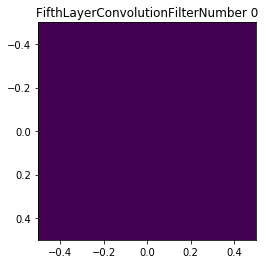

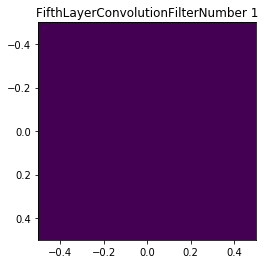

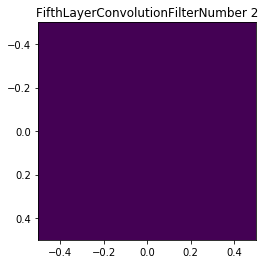

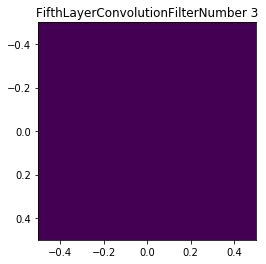

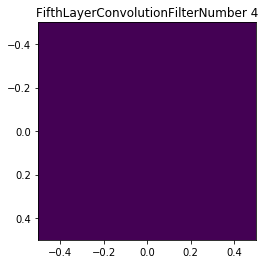

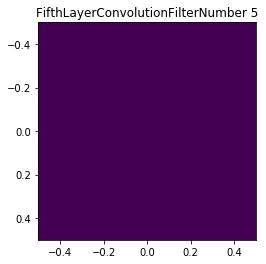

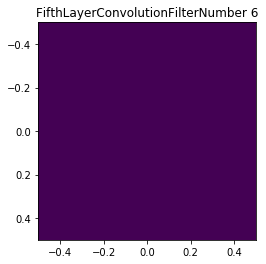

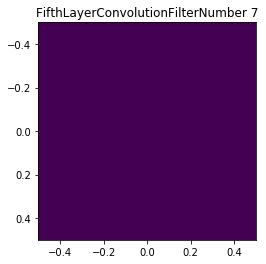

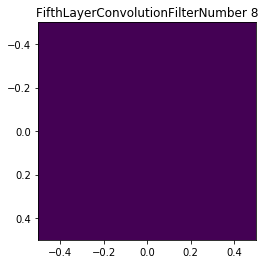

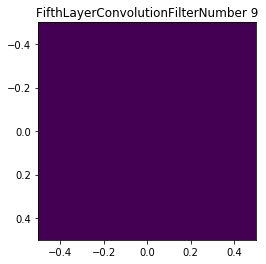

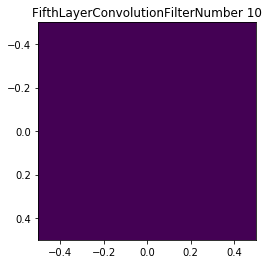

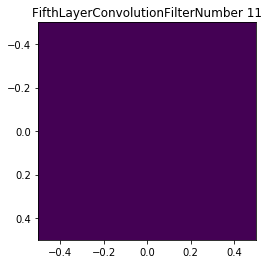

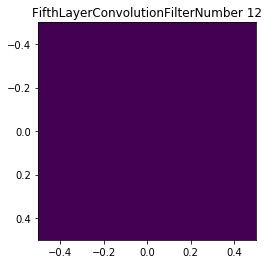

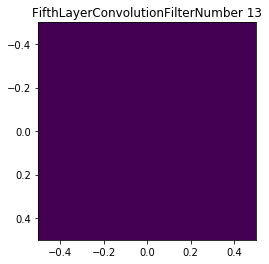

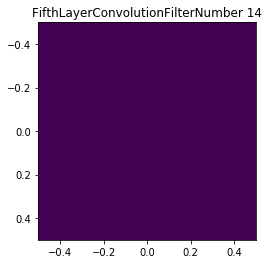

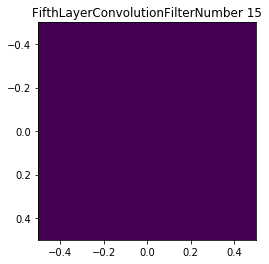

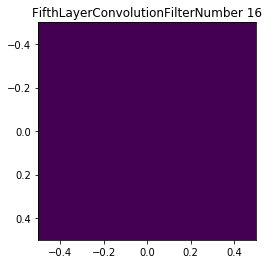

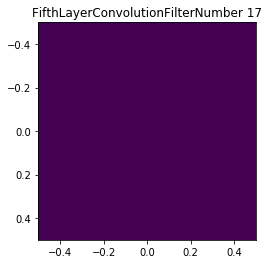

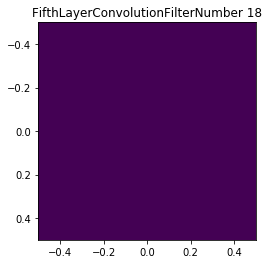

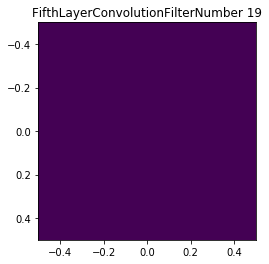

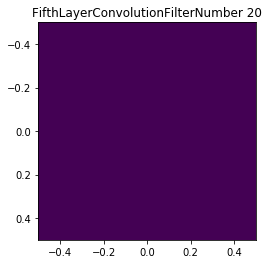

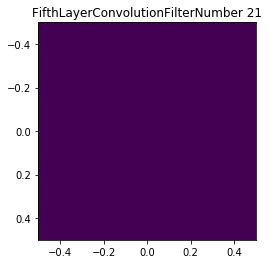

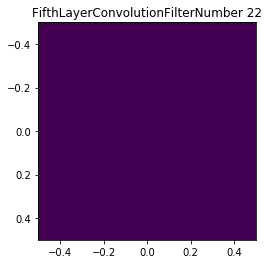

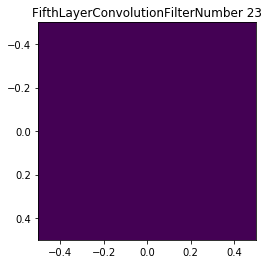

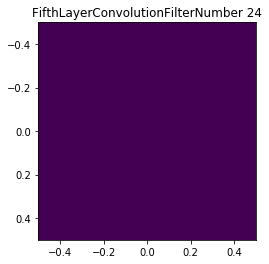

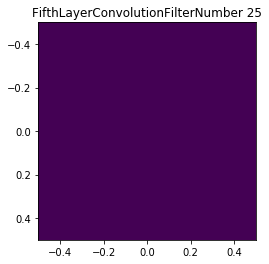

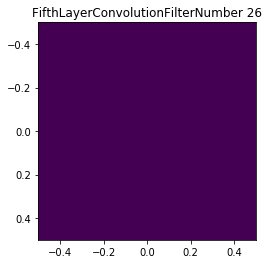

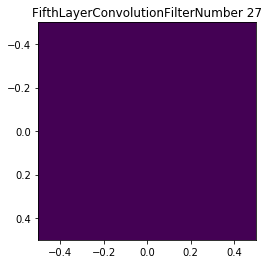

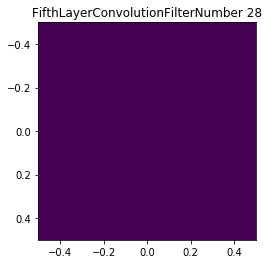

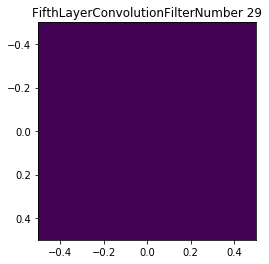

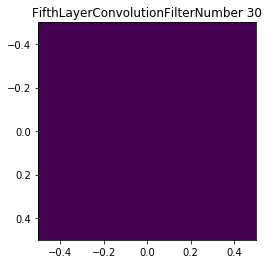

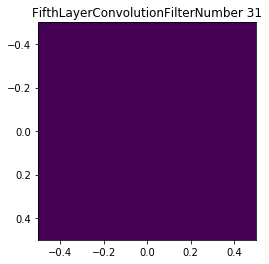

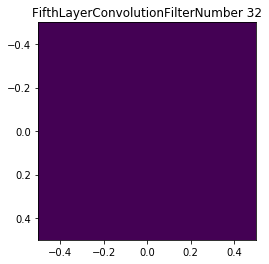

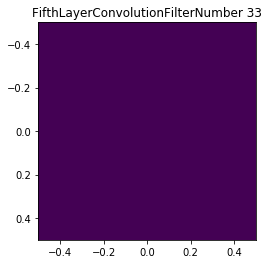

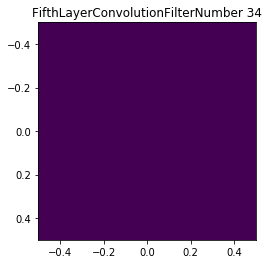

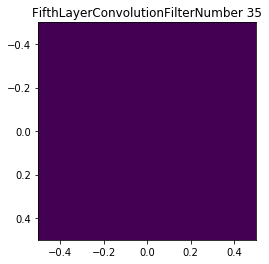

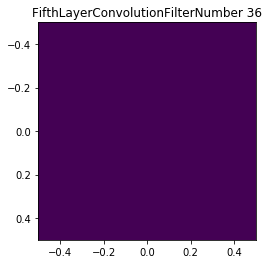

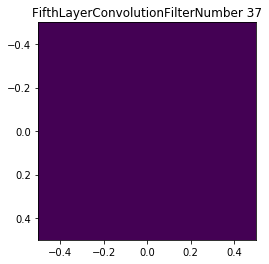

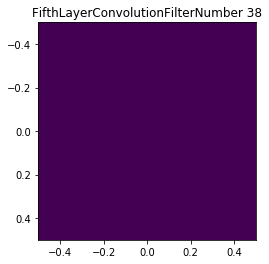

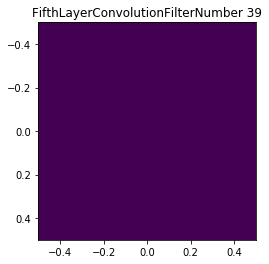

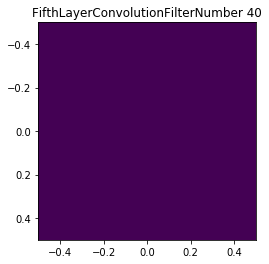

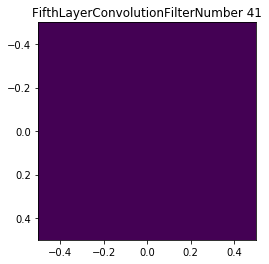

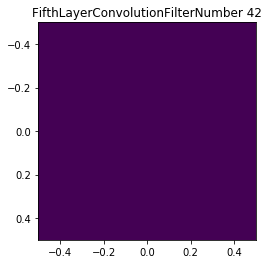

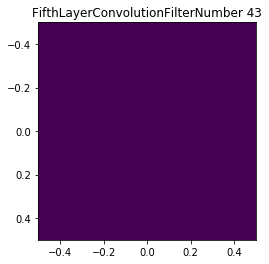

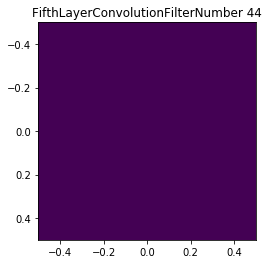

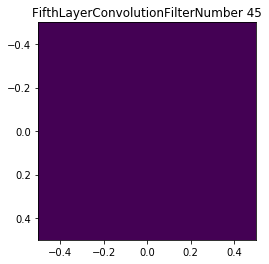

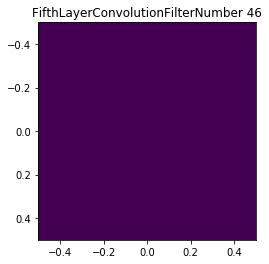

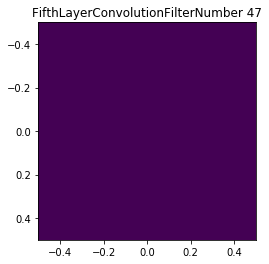

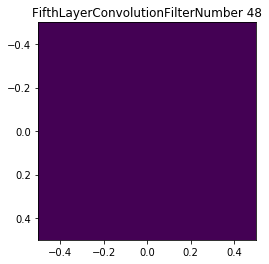

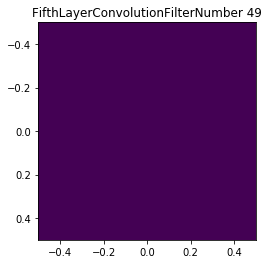

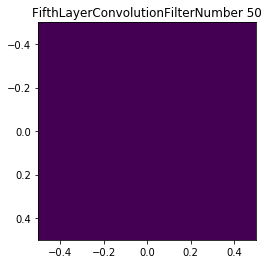

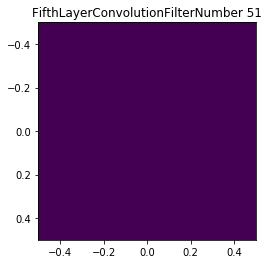

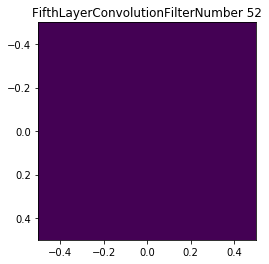

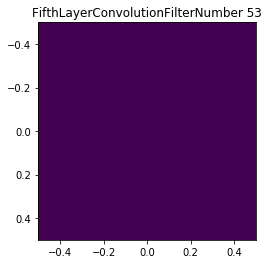

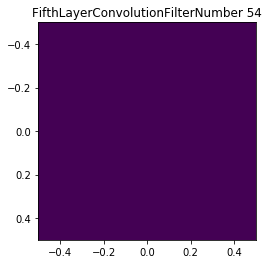

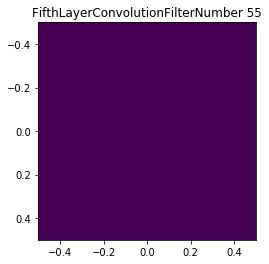

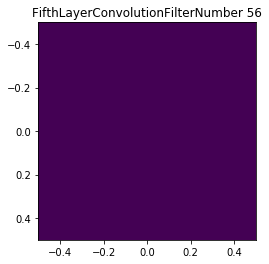

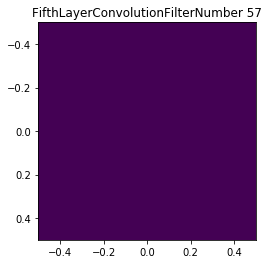

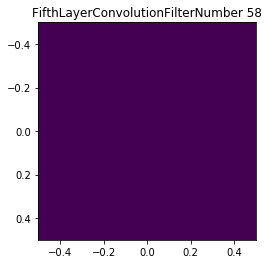

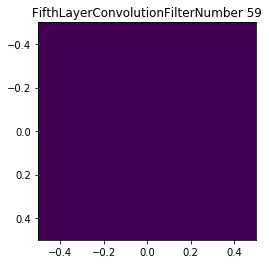

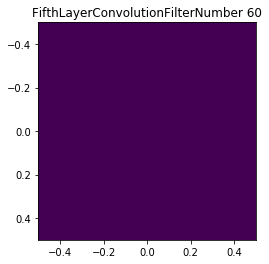

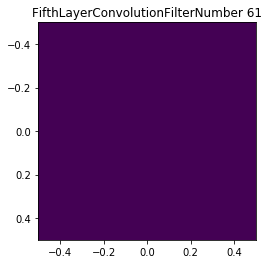

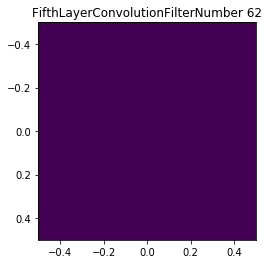

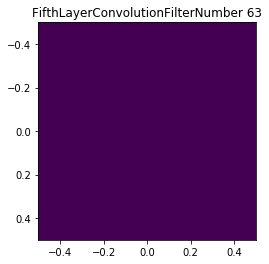

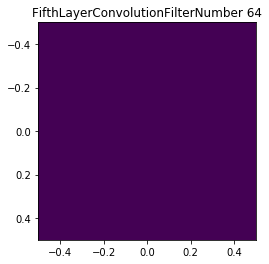

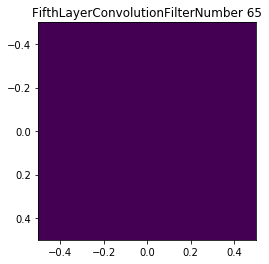

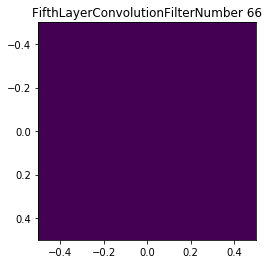

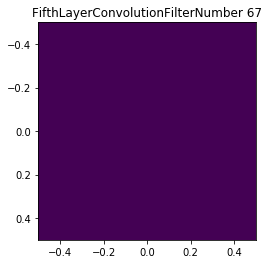

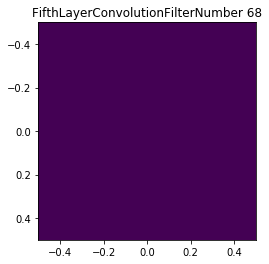

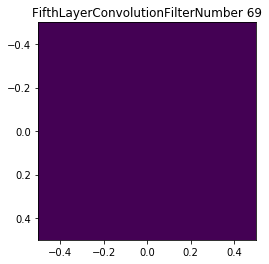

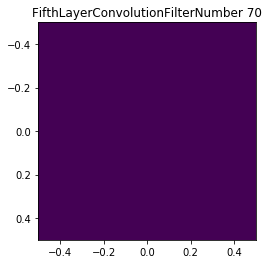

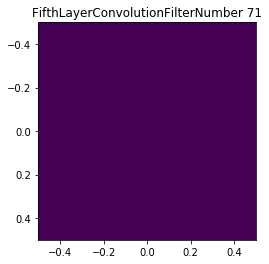

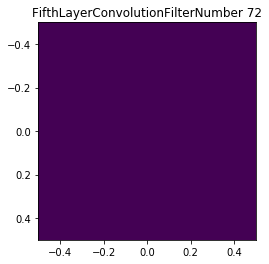

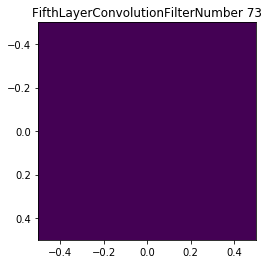

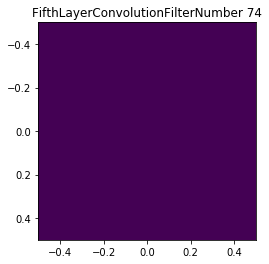

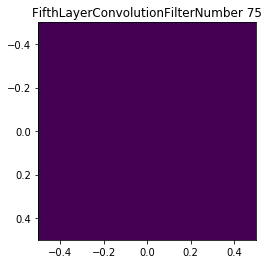

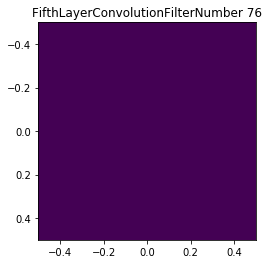

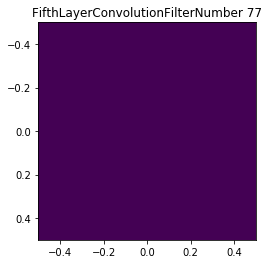

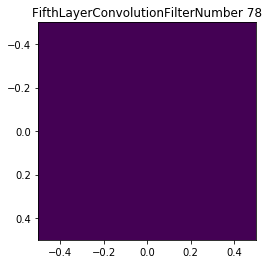

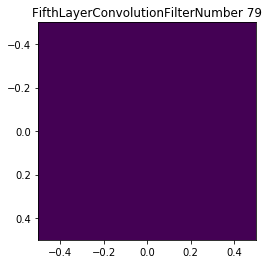

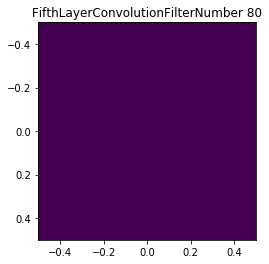

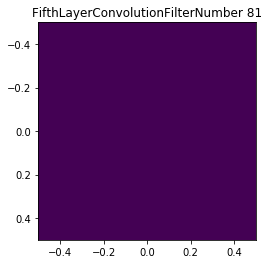

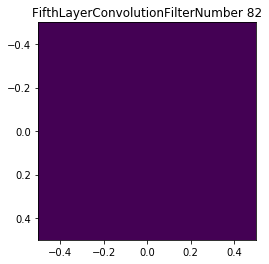

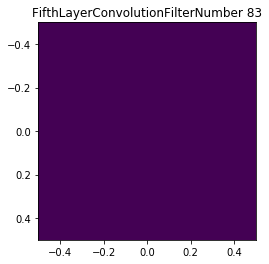

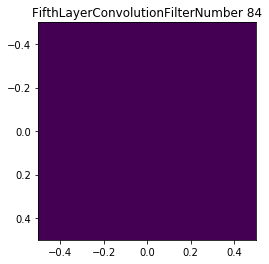

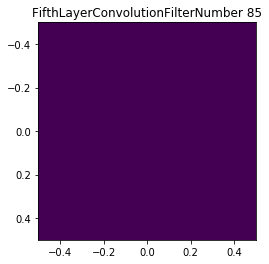

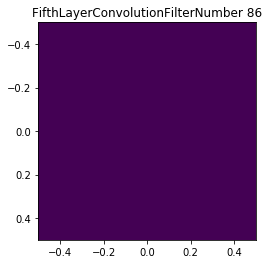

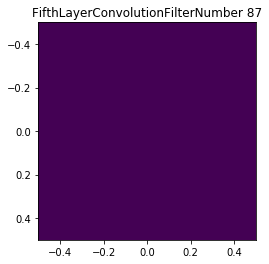

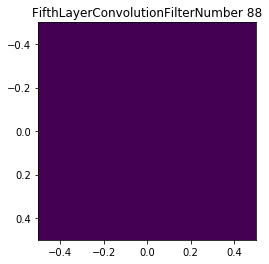

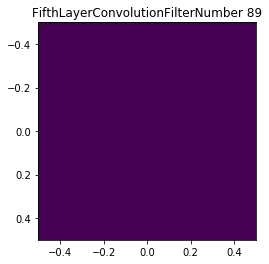

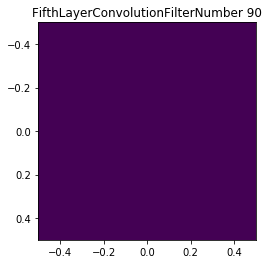

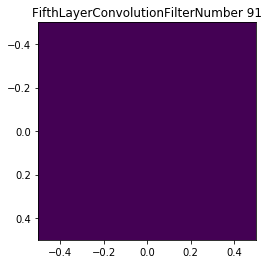

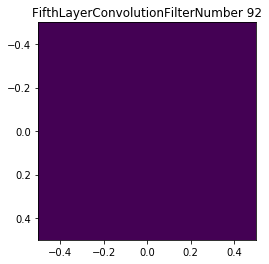

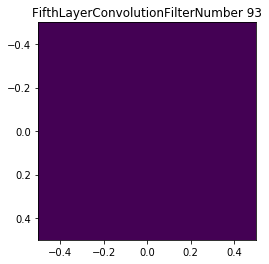

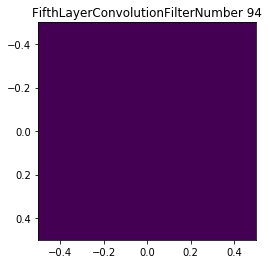

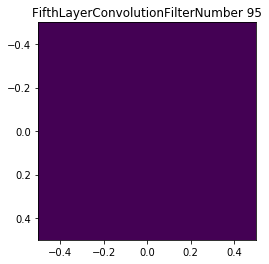

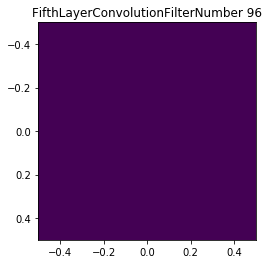

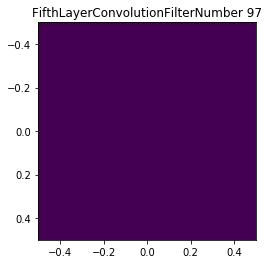

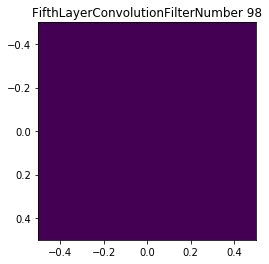

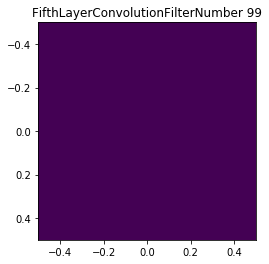

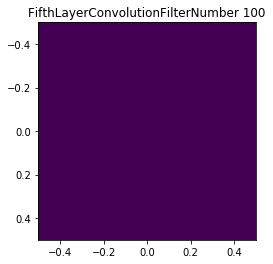

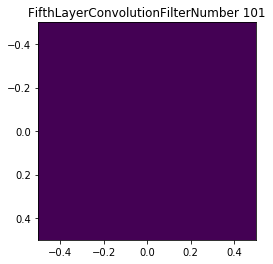

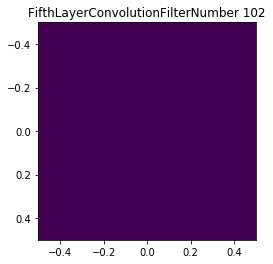

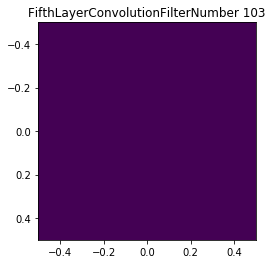

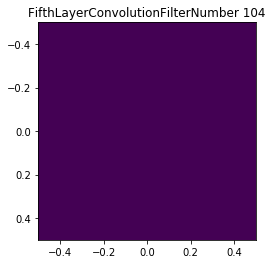

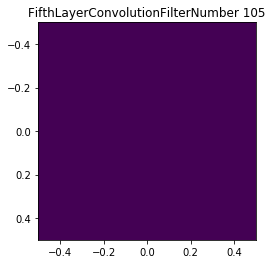

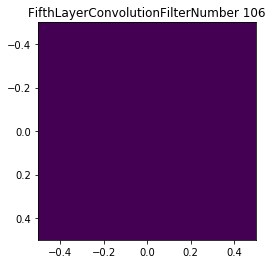

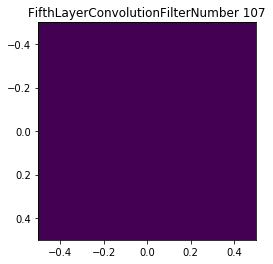

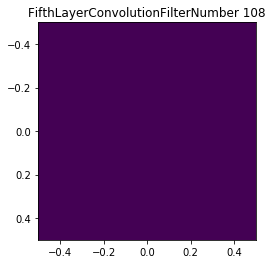

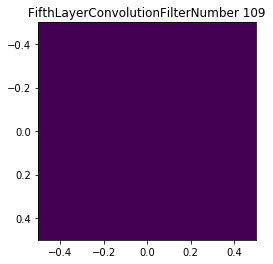

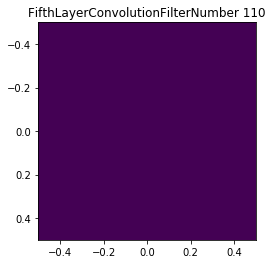

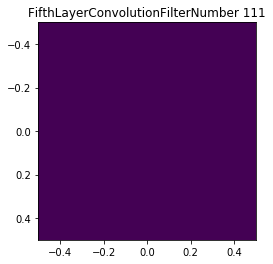

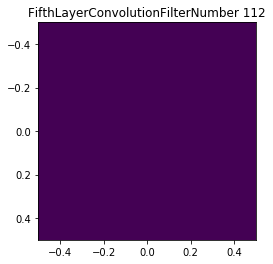

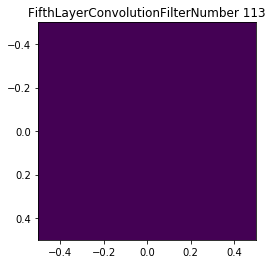

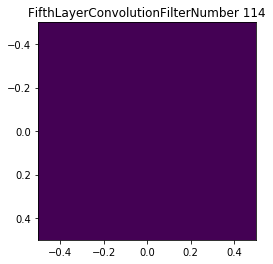

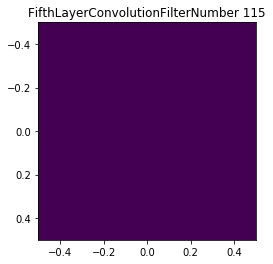

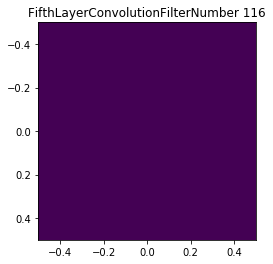

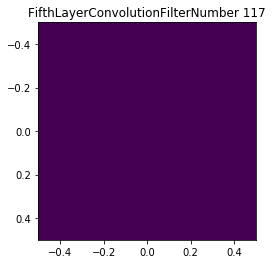

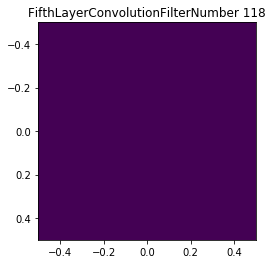

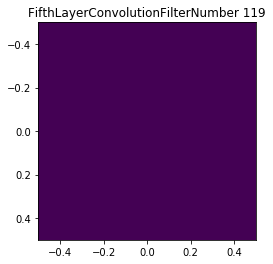

In [31]:
for k in range(0,120):
    plt.title('FifthLayerConvolutionFilterNumber {label}'.format(label=str(k)))
    plt.imshow(FifthLayerConvolutionFilter[k])
    plt.show()


WeightsForLayer5FullyConnected = np.random.randn(120,len(FourthLayerPoolingEntireVolume_flat))
BiasesForLayer5FullyConnected = np.random.randn(120)
FiftLayerFullyConnected = (WeightsForLayer5FullyConnected@np.array(FourthLayerPoolingEntireVolume_flat))+BiasesForLayer5FullyConnected

FiftLayerFullyConnected.shape

In [32]:
WeightsForLayer6FullyConnected = np.random.randn(84,120)
BiasesForLayer6FullyConnected = np.random.randn(84)
SixthLayerFullyConnected = (WeightsForLayer6FullyConnected@np.array(list(FifthLayerConvolutionFilter)))+BiasesForLayer6FullyConnected

In [33]:
SixthLayerFullyConnected = getSigmoid(SixthLayerFullyConnected,'Relu')

In [34]:
SixthLayerFullyConnected.shape

(84,)

In [35]:
WeightsForOutputLayer = np.random.randn(10,SixthLayerFullyConnected.shape[0])
OutputLayer = np.zeros(10).reshape(10,1)

In [36]:
for i in range(0,10):
    OutputLayer[i]=np.sum((SixthLayerFullyConnected-WeightsForOutputLayer[i,:].T)**2)

In [37]:
OutputLayer

array([[26712179.3919494 ],
       [26713238.73298415],
       [26719220.72884276],
       [26724107.60228315],
       [26732886.45698974],
       [26728185.61191707],
       [26733267.96788912],
       [26704471.24126317],
       [26723003.86918316],
       [26722646.43130105]])

pickle_in = open("Pictures.pickle","rb")
Pictures1 = pickle.load(pickle_in)
#pixel_values = Pictures1[0][7]
print(Pictures1[0][3].shape)
#pixel_values = X_train[0]
#pixel_values = np.array(pix_val_flat).reshape(3,height, width)
#0.2989 * r + 0.5870 * g + 0.1140 * b
#pixel_values1 = ((0.2989*pixel_values[:,:,2])+(0.5870*pixel_values[:,:,0])+(0.1140 *pixel_values[:,:,1]))
#pixel_values = pixel_values[10:330,90:330,:]
import tensorflow as tf
mnist = tf.keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist
X_train = np.asarray(X_train)#, dtype=np.float32)